<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Recycle_018_Cassificacao_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from sklearn.model_selection import train_test_split

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [46]:
#clonando os arquivos 
!git clone https://github.com/thessafuzaro/Trabalho_Imagens
%cd Trabalho_Imagens

Cloning into 'Trabalho_Imagens'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 61 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), done.
/content/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens


In [47]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [48]:
# all images are load in variable x...
Arq =['Daisy.zip','Dandelion.zip','Rose.zip','Not_Flower.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [49]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [50]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [51]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [53]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [58]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [59]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_train.append(y[II])

In [60]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(y[II])

In [61]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

In [62]:

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [63]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)
print("Returned:", r)

Epoch 1/15
39/39 [==============================] - 2s 30ms/step - loss: 3.0831 - accuracy: 0.3974 - val_loss: 1.2728 - val_accuracy: 0.3961
Epoch 2/15
39/39 [==============================] - 1s 13ms/step - loss: 1.1276 - accuracy: 0.5419 - val_loss: 1.3863 - val_accuracy: 0.3506
Epoch 3/15
39/39 [==============================] - 1s 14ms/step - loss: 0.9680 - accuracy: 0.6302 - val_loss: 1.2887 - val_accuracy: 0.3766
Epoch 4/15
39/39 [==============================] - 1s 14ms/step - loss: 0.8853 - accuracy: 0.6335 - val_loss: 1.2874 - val_accuracy: 0.3896
Epoch 5/15
39/39 [==============================] - 1s 14ms/step - loss: 0.8741 - accuracy: 0.6581 - val_loss: 1.5851 - val_accuracy: 0.3766
Epoch 6/15
39/39 [==============================] - 1s 14ms/step - loss: 0.8387 - accuracy: 0.6777 - val_loss: 1.2254 - val_accuracy: 0.4351
Epoch 7/15
39/39 [==============================] - 1s 14ms/step - loss: 0.7691 - accuracy: 0.6878 - val_loss: 1.0972 - val_accuracy: 0.4773
Epoch 8/15
39

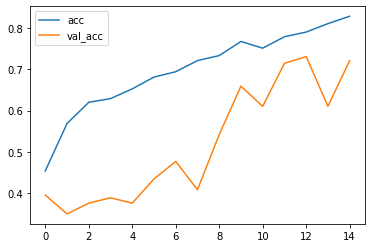

In [64]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

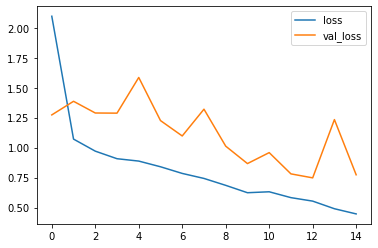

In [65]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()